In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat


In [123]:
#算出离每个点最近的核
def find_closest_centroids(X,centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

In [124]:
data = loadmat('/home/teemo/ML/data/ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3,3],[6,2],[8,5]])

idx = find_closest_centroids(X,initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [125]:
data2 = pd.DataFrame(data.get('X'),columns=['X1','X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


/home/teemo/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


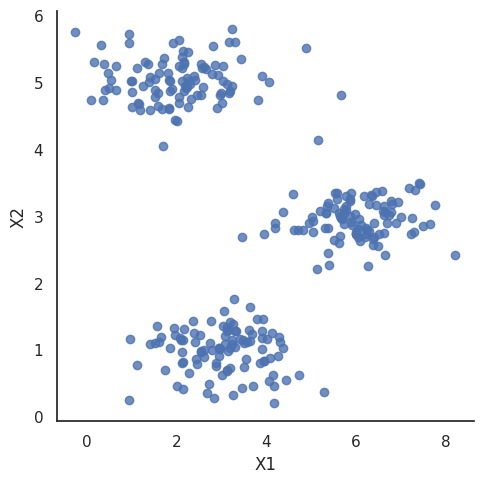

In [126]:
sns.set(context='notebook',style='white')
sns.lmplot('X1','X2',data=data2,fit_reg=False)
plt.show()

In [127]:
#计算聚类中心
def compute_centroids(X,idx,k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:],axis=1)/ len(indices[0])).ravel()
    return centroids

In [128]:
compute_centroids(X,idx,3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [129]:
#将样本分配给最近的簇并重新计算簇的聚类中心
def run_k_means(X,initial_centroids,max_iters):
    m,n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,k)
        
    return idx,centroids
    

In [130]:
idx,centroids = run_k_means(X,initial_centroids,10)

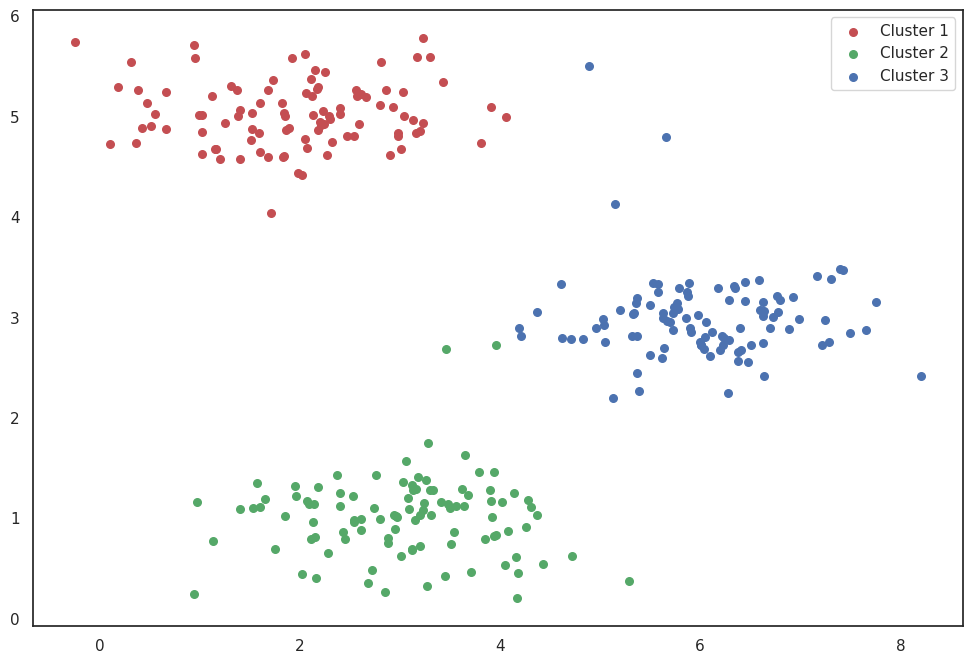

In [131]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='r',label='Cluster 1')
ax.scatter(cluster2[:,0],cluster2[:,1],s=30,color='g',label='Cluster 2')
ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='b',label='Cluster 3')
ax.legend()
plt.show()


In [132]:
#初始化聚类中心
def init_centroids(x,k):
    m,n = x.shape
    centroids = np.zeros((k,n))
    idx = np.random.randint(0,m,k)
    
    for i in range(k):
        centroids[i,:] = x[idx[i],:]
    return centroids

In [133]:
initial_centroids = init_centroids(X,3)
idx,centroids = run_k_means(X,initial_centroids,10)
centroids

array([[3.04367119, 1.01541041],
       [1.95399466, 5.02557006],
       [6.03366736, 3.00052511]])

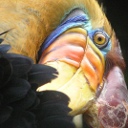

In [134]:
from IPython.display import Image
Image(filename='/home/teemo/ML/data/bird_small.png')

In [135]:
image_data = loadmat('/home/teemo/ML/data/bird_small.mat')
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [136]:

A = image_data['A']
A.shape

(128, 128, 3)

In [143]:
A = A / 255.
X = np.reshape(A,(A.shape[0] * A.shape[1] , A.shape[2]))
X.shape

(16384, 3)

In [144]:
initial_centroids = init_centroids(X,16)

idx,centroids = run_k_means(X,initial_centroids,10)

idx = find_closest_centroids(X,centroids)

x_recovered = centroids[idx.astype(int),:]
x_recovered.shape

(16384, 3)

In [145]:
x_recovered = np.reshape(x_recovered,(A.shape[0],A.shape[1],A.shape[2]))
x_recovered.shape

(128, 128, 3)

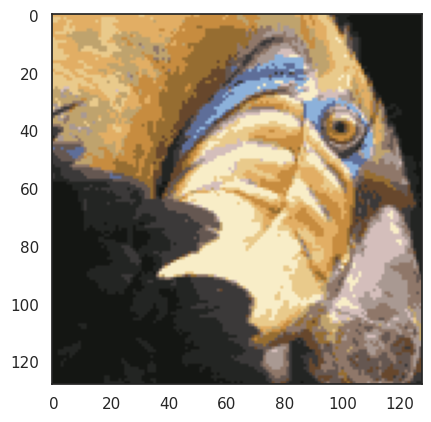

In [146]:
plt.imshow(x_recovered)
plt.show()


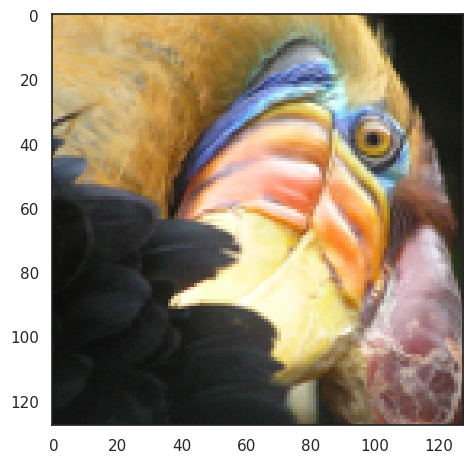

In [147]:
from skimage import io
pic = io.imread('/home/teemo/ML/data/bird_small.png') / 255
io.imshow(pic)
plt.show()

In [148]:
pic.shape

(128, 128, 3)

In [149]:
data = pic.reshape(128*128,3)
data.shape

(16384, 3)

In [151]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=16,n_init=100)

In [152]:
model.fit(data)

KMeans(n_clusters=16, n_init=100)

In [153]:
centroids = model.cluster_centers_
print(centroids.shape)

c = model.predict(data)
print(c.shape)

(16, 3)
(16384,)


In [162]:
centroids[c].shape

(16384, 3)

In [164]:
compressed_pic = centroids[c].reshape((128,128,3))

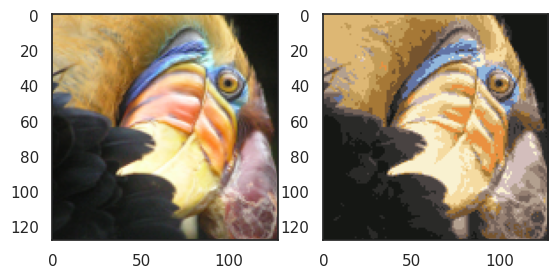

In [165]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)

plt.show()

In [178]:
data = loadmat('/home/teemo/ML/data/ex7data1.mat')
data


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

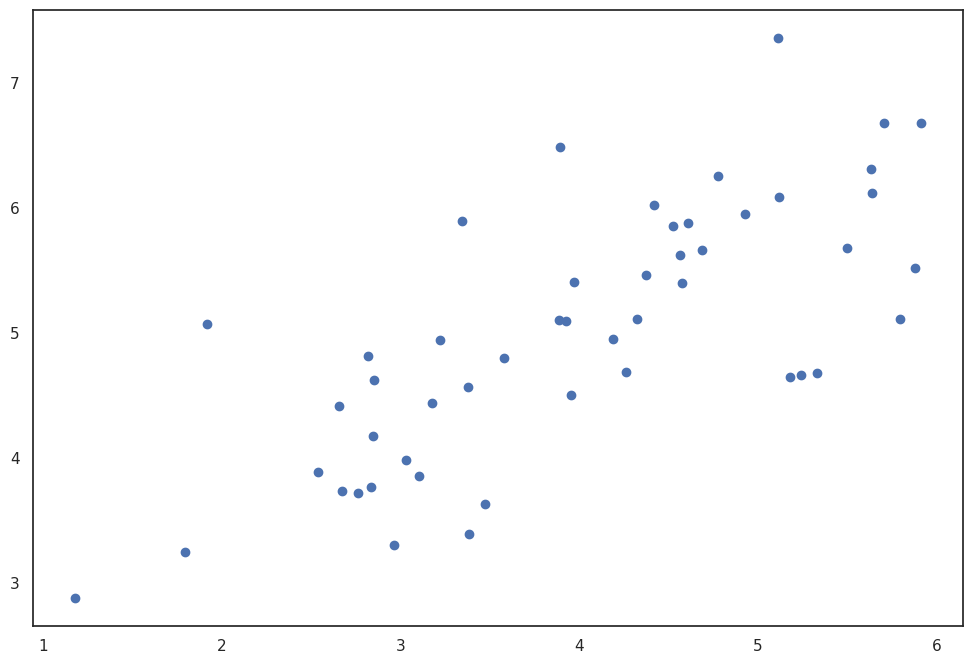

In [179]:
X = data['X']
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1])
plt.show()

In [180]:
def pca(X):
    X = (X - X.mean()) / X.std()
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    U,S,V = np.linalg.svd(cov)
    
    return U,S,V

In [181]:
U,S,V  = pca(X)
U,S,V


(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [182]:
def project_data(X,U,k):
    U_reduced = U[:,:k]
    return np.dot(X,U_reduced)

In [183]:
Z = project_data(X,U,1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [184]:
def recover_data(Z,U,k):
    U_reduced = U[:,:k]
    return np.dot(Z,U_reduced.T)

In [185]:
X_recovered = recover_data(Z,U,1)
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

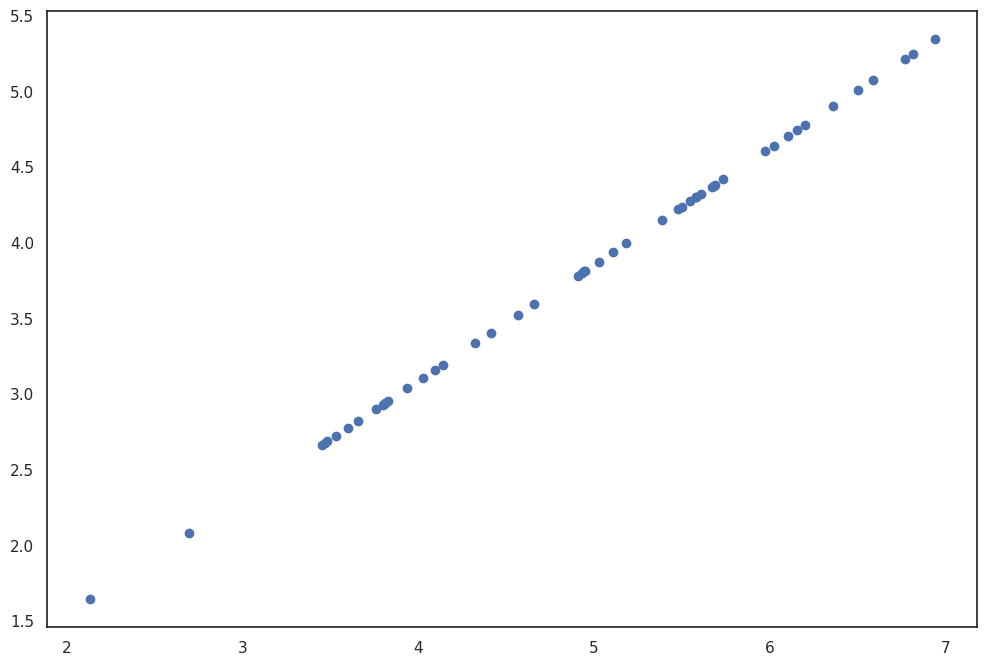

In [186]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:,0]),list(X_recovered[:,1]))
plt.show()

In [187]:
faces = loadmat('/home/teemo/ML/data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [189]:
def plot_n_image(X,n):
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))
    
    first_n_images = X[:n,:]
    
    fig,ax_array = plt.subplots(nrows=grid_size,ncols=grid_size,sharey=True,sharex=True,figsize=(8,8))
    
    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r,c].imshow(first_n_images[grid_size * r + c].reshape((pic_size,pic_size)))
            plt.xtricks(np.array([]))
            plt.ytricks(np.array([]))
            

In [191]:
face = np.reshape(X[3,:],(32,32))


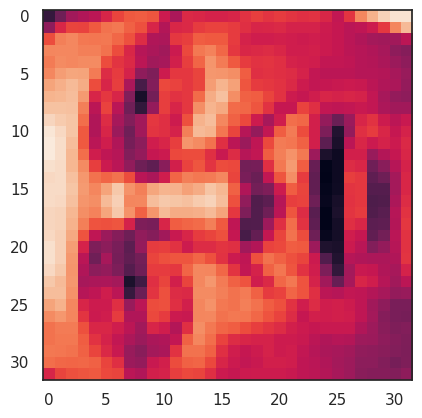

In [192]:
plt.imshow(face)
plt.show()

In [193]:
U,S,V = pca(X)
Z = project_data(X,U,100)

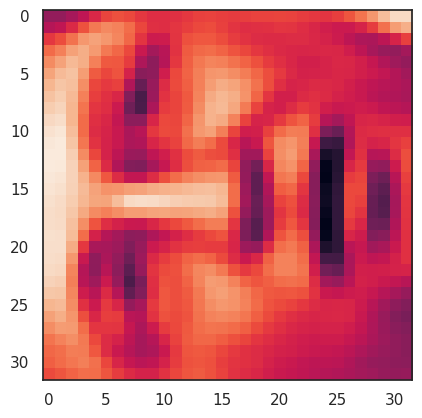

In [194]:
X_recovered = recover_data(Z,U,100)
face = np.reshape(X_recovered[3,:],(32,32))
plt.imshow(face)
plt.show()